# HR Attrition Analysis

### Import necessary libraries

In [29]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_theme(style="dark")
from warnings import filterwarnings
filterwarnings('ignore')

### Data Collection

In [30]:
# Reading Data
df = pd.read_csv(r'data\HR_Employee_Attrition.csv',na_values= "na")

In [31]:
# Check rows and columns in dataset
print(f"No. of Rows in dataset: {df.shape[0]}")
print(f"No. of Columns in dataset: {df.shape[1]}")

No. of Rows in dataset: 1470
No. of Columns in dataset: 35


In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [33]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### Data Preprocessing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [35]:
# define numerical & categorical columns
numeric_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if df[col].dtype == 'O']

# print columns
print(f'We have {len(numeric_col)} numerical col : {numeric_col}')
print(f'\nWe have {len(categorical_col)} categorical col : {categorical_col}')

We have 26 numerical col : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

We have 9 categorical col : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [36]:
# Checking the number of missing values in the dataset to confirm
missing_values = df.isnull().sum()

# Displaying the count of missing values for each column
missing_values[missing_values > 0]


Series([], dtype: int64)

- Data Overview -   
    - The dataset has *__1,470 entries__* and *__35 columns__*.
    - No missing values.
    - Dataset contains **26 numerical** column and **9 categorical** column.
- Key Analyses:     

    - **Attrition Insights**: Analyze factors related to employee attrition.
    - **Demographics**: Examine age, education, and department distribution.
    - **Job Satisfaction**: Investigate job roles, work-life balance, and satisfaction scores.
    - **Performance Metrics**: Correlate attrition with working years, promotions, and train

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


The summary statistics for numerical columns highlight potential outliers, particularly in variables like:

- **MonthlyIncome**: Maximum is significantly higher than the 75th percentile.
- **Standardized Values**: Some columns, like EmployeeCount and StandardHours, have constant values and can be excluded from analysis.
- **Key Metrics**: Columns such as TotalWorkingYears, YearsAtCompany, and WorkLifeBalance are central to employee performance and satisfaction..

In [38]:
# Dropping column that are not useful for the analysis
df.drop(['StandardHours','EmployeeCount'],axis=1,inplace=True)

***Plan for Outlier Treatment***
1. *Detection*: Use the Interquartile Range (IQR) to detect outliers for each numerical column.
2. *Treatment*: Based on the context, handle outliers by:
    - Capping values to thresholds (e.g., winsorization) if they distort analyses.
    - Retaining if they reflect valid but rare scenarios.

In [39]:
# Function to identify Outliers
def detect_outliers_iqr(df, column):
    """Function helps to detect outliers in numerical columns"""
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to treat Outliers
def outlier_treatment(df,column):
    """Function helps to treat outliers in numerical columns"""
    for col in column:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        df[col] = df[col].clip(lower=lower,upper=upper)
        print(f"Outliers in {col} have been treated")
    return df

In [40]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_treatment_results = {}

for col in numeric_cols:
    # Detect outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    
    # Count of outliers
    outlier_count = outliers.shape[0]
    
    # Store the results for summary
    outlier_treatment_results[col] = {
        "Outlier Count Before": outlier_count,
        "Lower Bound": lower,
        "Upper Bound": upper,
    }

# Convert results to a DataFrame for review
outlier_treatment_summary_df = pd.DataFrame(outlier_treatment_results).T
outlier_treatment_summary_df.sort_values("Outlier Count Before", ascending=False)

,Outlier Count Before,Lower Bound,Upper Bound
TrainingTimesLastYear,238.0,0.500,4.500
PerformanceRating,226.0,3.000,3.000
MonthlyIncome,114.0,-5291.000,16581.000
YearsSinceLastPromotion,107.0,-4.500,7.500
YearsAtCompany,104.0,-6.000,18.000
StockOptionLevel,85.0,-1.500,2.500
TotalWorkingYears,63.0,-7.500,28.500
NumCompaniesWorked,52.0,-3.500,8.500
YearsInCurrentRole,21.0,-5.500,14.500
YearsWithCurrManager,14.0,-5.500,14.500


In [41]:

def box_subplots(dataset,numeric_col:list()):
    """ This function helps to plot the subplots of boxplots.

    Args:
        dataset (Dataframe): Dataset
        numeric_col (List): Numeric column in list
    """
    
    rows = math.ceil(len(numeric_col)/2)
    col=2
    fig, axs = plt.subplots(rows, col, figsize=(col*6,rows*5))
    axs=axs.flatten()
    plot_idx = 0
    for i in numeric_col:
        sns.boxplot(data=dataset,x=i, palette='viridis',ax=axs[plot_idx])
        plot_idx += 1
    
    plt.tight_layout()
    plt.show()    

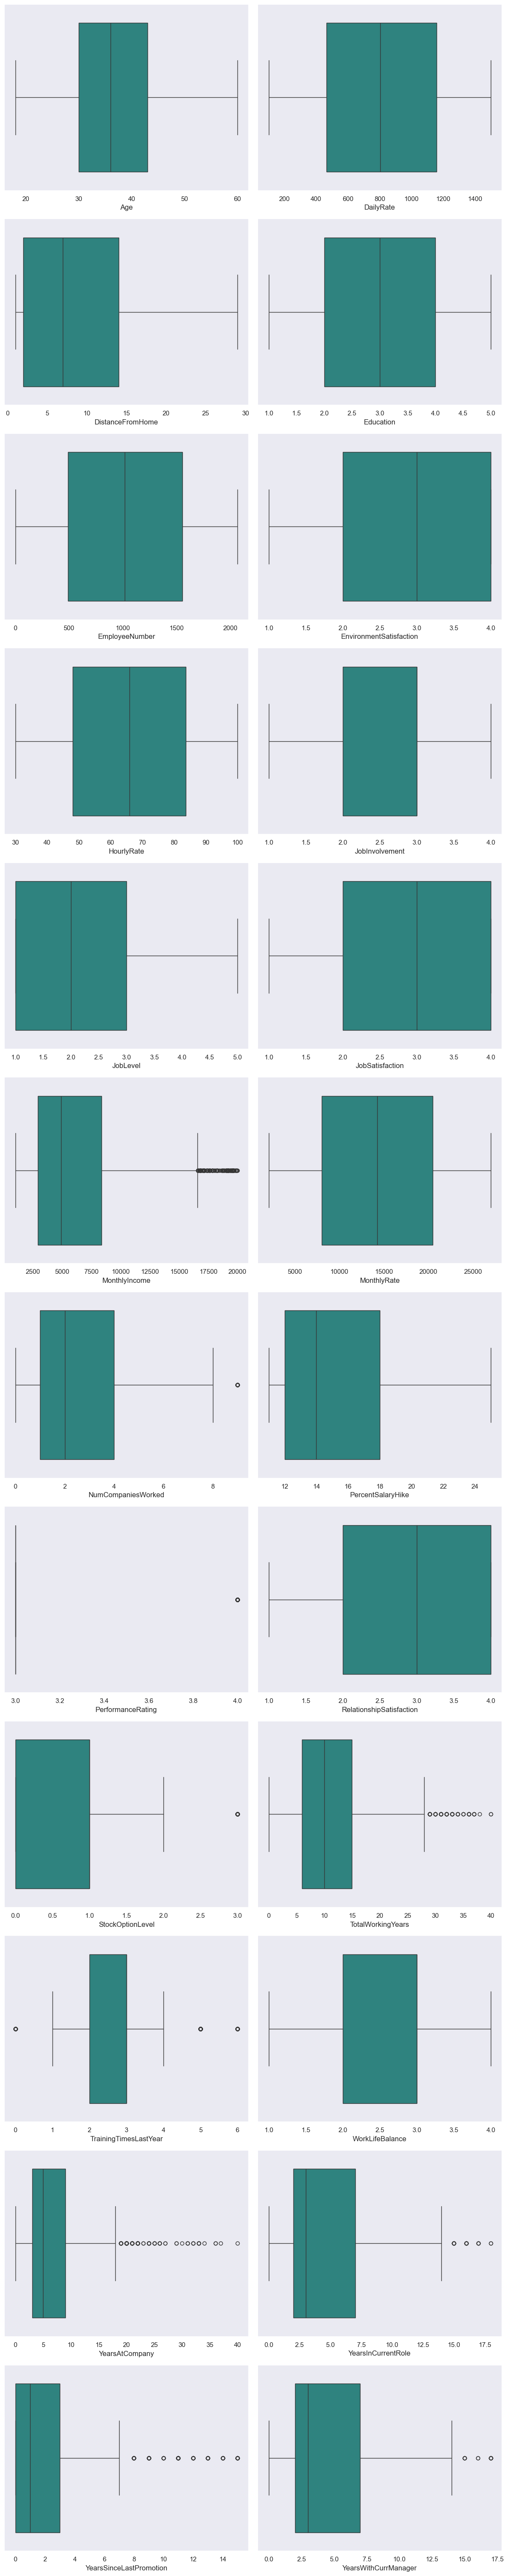

In [42]:
box_subplots(df,numeric_cols)

***Treatment Methods for Outliers***

1. *Retain Outliers*   
    If outliers represents genuine data.
2. *Remove Outliers*    
    If outliers are errors or anomalies.
3. *Transform Outliers*    
    To reduce the effect of extreme values in skewed distributions.
4. *Winsorize Outliers*   
    If extreme values distort statistical summaries or models.
5. *Impute outliers*   
    If missing values are present and outliers are a result of missing data.

First, We will check data is fill genuinely. Then I will decide to which method is best for treating outliers.   
We will check **"MonthlyIncome", "YearsAtCompany", "TrainingTimesLastYear", "YearsSinceLastPromotion"** columns.

In [43]:
def scatter_subplots(dataset,
                    rows: int,
                    col: int,
                    x: list(),
                    y: list(),
                    hue: str=None):
    """
    Create scatterplots as subplots for combinations of x and y variables.

    Parameters:
        dataset (DataFrame): The dataset to visualize.
        rows (int): Number of rows in the subplot grid.
        cols (int): Number of columns in the subplot grid.
        x (list): List of column names for x-axes.
        y (list): List of column names for y-axes.
        hue (str): Optional; Column name for grouping (hue).
    """
    fig, axs = plt.subplots(rows, col, figsize=(col*6,rows*5))
    axs = axs.flatten()
    plot_idx = 0
    for i in x:
        for j in y:
            if plot_idx < len(axs):
                sns.scatterplot(data=dataset,x=i,y=j,hue=hue,ax=axs[plot_idx])
                axs[plot_idx].set_title(f"{j} vs {i}")
                axs[plot_idx].set_xlabel(i)
                axs[plot_idx].set_ylabel(j)
                plot_idx += 1
            else:
                print("Not enough subplot spaces for all combinations of x and y.")
                break
    plt.tight_layout()
    plt.show()

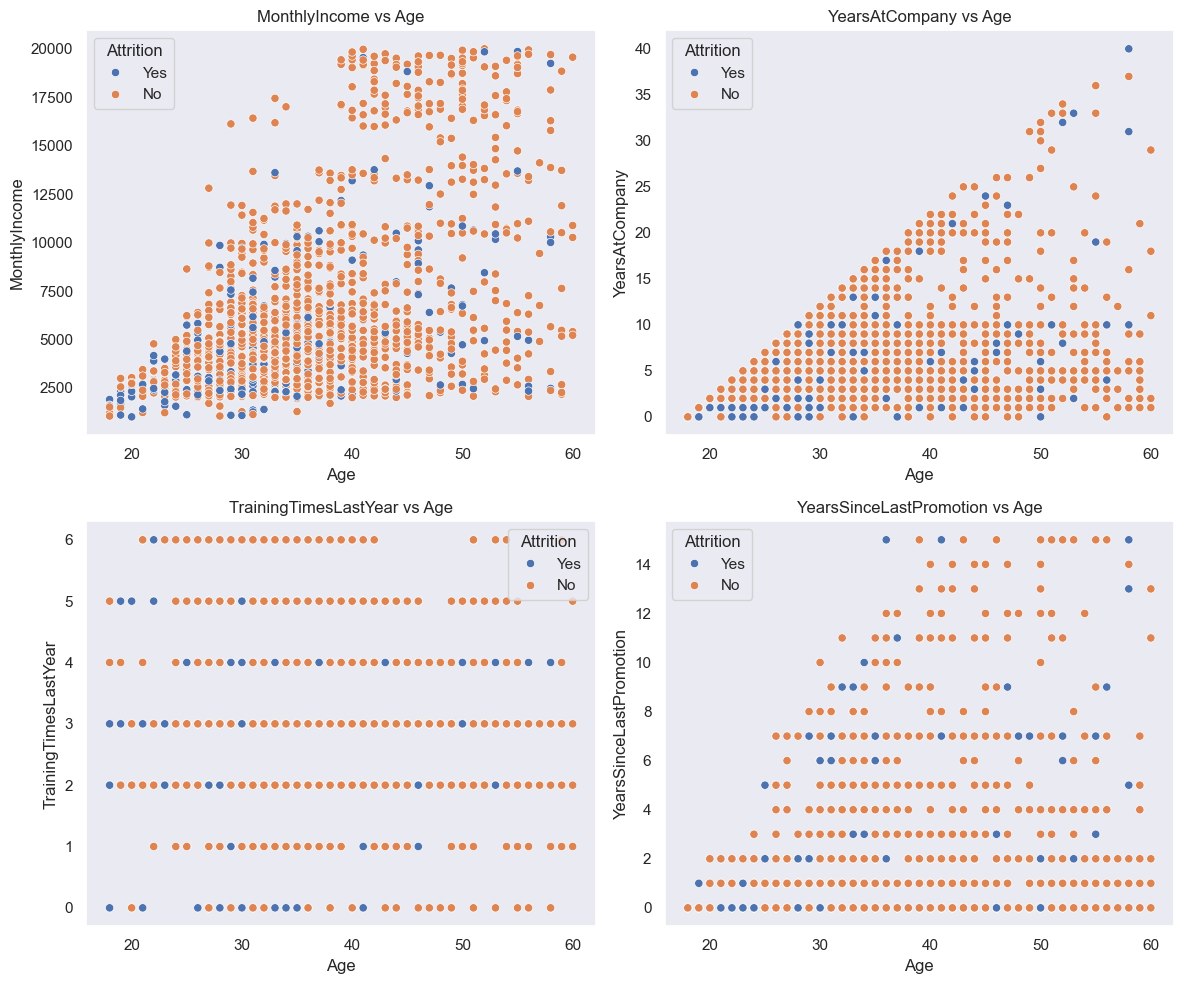

In [44]:
scatter_subplots(df,2,2,['Age'],["MonthlyIncome", "YearsAtCompany", "TrainingTimesLastYear", "YearsSinceLastPromotion"],hue='Attrition')

By checking the above graph, we can conclude that all the data is genuine as it represent meaningful data. So I retain outliers as of now. I will treat outliers later.

Insights from above plot - 
1. Monthly Income vs. Age   
    - Monthly income increases with age, which aligns with employees advancing in their careers.
    - Attrition (blue points) is more prevalent in employees with lower monthly income, regardless of age.
    - Employees earning higher incomes (above 12,500) show minimal attrition.

2. Years at Company vs. Age   
    - As expected, older employees tend to have more years at the company.
    - Attrition is concentrated among employees with fewer years at the company, especially younger ones.
    - Employees with 10+ years at the company exhibit low attrition.

3. Total Working Years vs. Age
    - A strong linear relationship exists between age and total working years.
    - Attrition (blue points) is mostly concentrated in employees with fewer total working years.
    - Employees with 20+ total working years have minimal attrition, regardless of age.

4. Years since Last Promotion vs. Age
    - For younger employees, the number of years since the last promotion is low, as expected.
    - Attrition is concentrated among employees who have gone many years without a promotion, especially in mid-career stages (ages 30–45).
    - Older employees show fewer cases of attrition, even with long gaps since their last promotion.

Attrition
No     1233
Yes     237
Name: count, dtype: int64


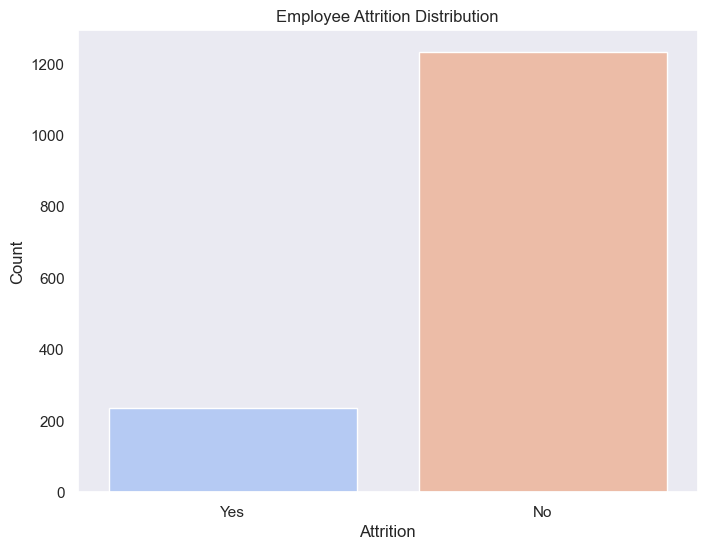

In [45]:
print(df['Attrition'].value_counts())
# Plotting the distribution of Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

### Age and Attrition

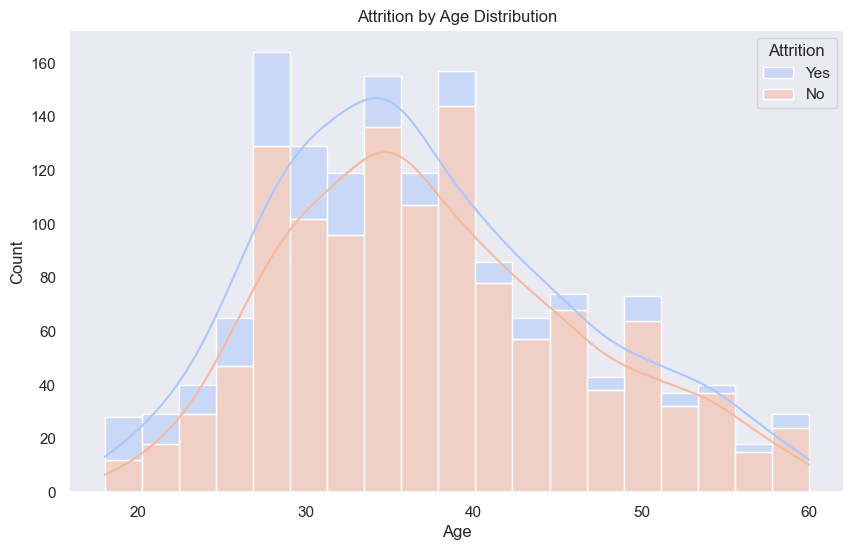

In [46]:
# Visualizing Attrition by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", palette="coolwarm", kde=True)
plt.title("Attrition by Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

1. Younger employees (20–30) are at the highest risk of attrition.   
This could be due to factors such as career exploration, dissatisfaction with current roles, or better opportunities elsewhere.
2. Middle-aged employees (30–40) show the highest retention and make up the largest segment of the workforce.

3. Attrition is minimal for older employees (40+ years), likely due to greater job stability, satisfaction, or fewer career-switching tendencies at this stage.

### Job Satisfaction and Attrition

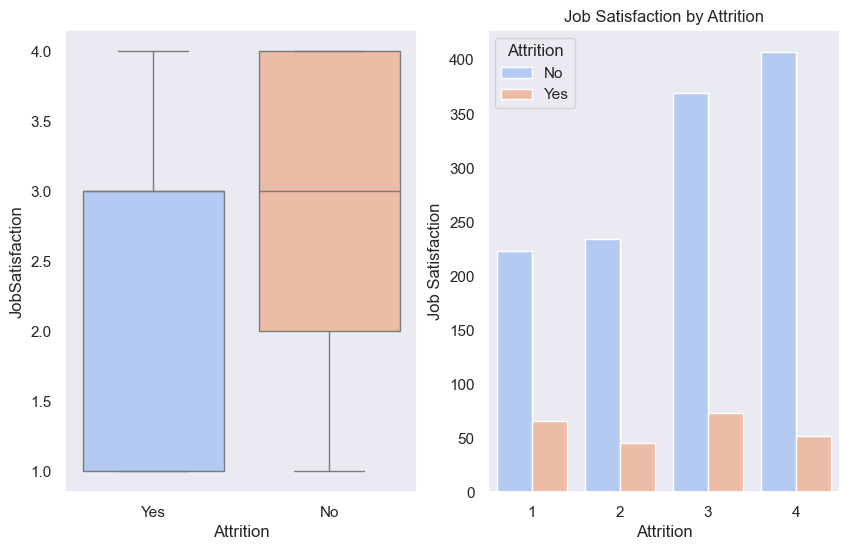

In [47]:
# Visualizing Job Satisfaction by Attrition
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.boxplot(x="Attrition", y="JobSatisfaction", data=df, palette="coolwarm",ax=axs[0])
sns.countplot(x="JobSatisfaction",hue='Attrition', data=df, palette="coolwarm",ax=axs[1])
plt.title("Job Satisfaction by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Job Satisfaction")
plt.show()

- Employees who stayed ("No" for Attrition) generally have higher median job satisfaction compared to those who left ("Yes").
- The range of job satisfaction for employees who left is narrower, mostly between 1 and 3, while employees who stayed have satisfaction levels extending to 4.
- Employees who stayed ("No") dominate across all satisfaction levels, particularly at level 4.
- Employees who left ("Yes") are relatively concentrated at lower satisfaction levels (1, 2, and 3), with very few at level 4.

### Monthly-Income and Attrition

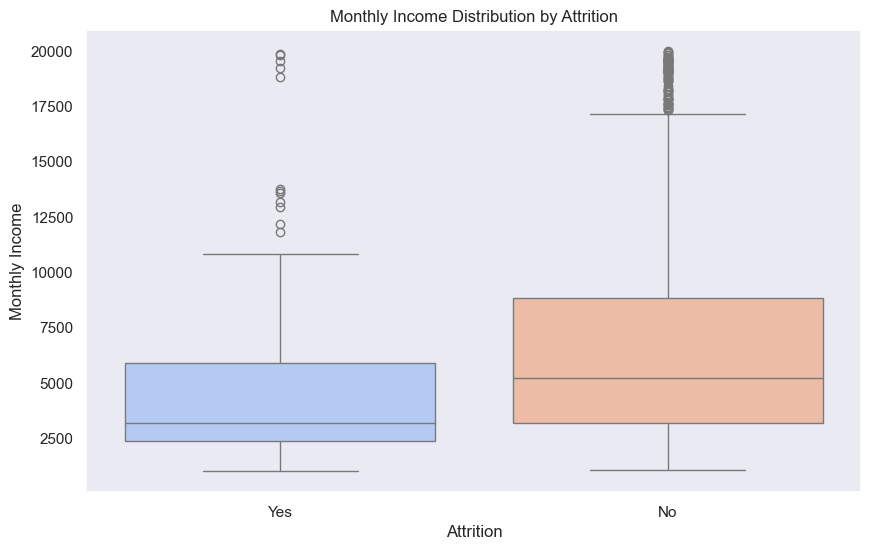

In [48]:
# Visualizing Attrition by Monthly Income
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, palette="coolwarm")
plt.title("Monthly Income Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

1. Employees Who Left (Attrition = "Yes"):

    - The median monthly income is lower compared to employees who stayed.
    - The range of income is narrower, with fewer high-income earners.
    - There are some outliers among higher earners (above $10,000/month).

2. Employees Who Stayed (Attrition = "No"):

    - The median monthly income is significantly higher.
    - The income range is broader, with more employees earning in the higher-income bracket.
    - Many high-income earners are outliers above $15,000/month.

- **Income and Attrition Relationship:** Employees with lower monthly incomes are more likely to leave the organization.
- **Retention Insight:** To reduce attrition, organizations may need to evaluate their salary structure, especially for lower-earning employees.

### Correlation and Attrition-Insights

<Axes: >

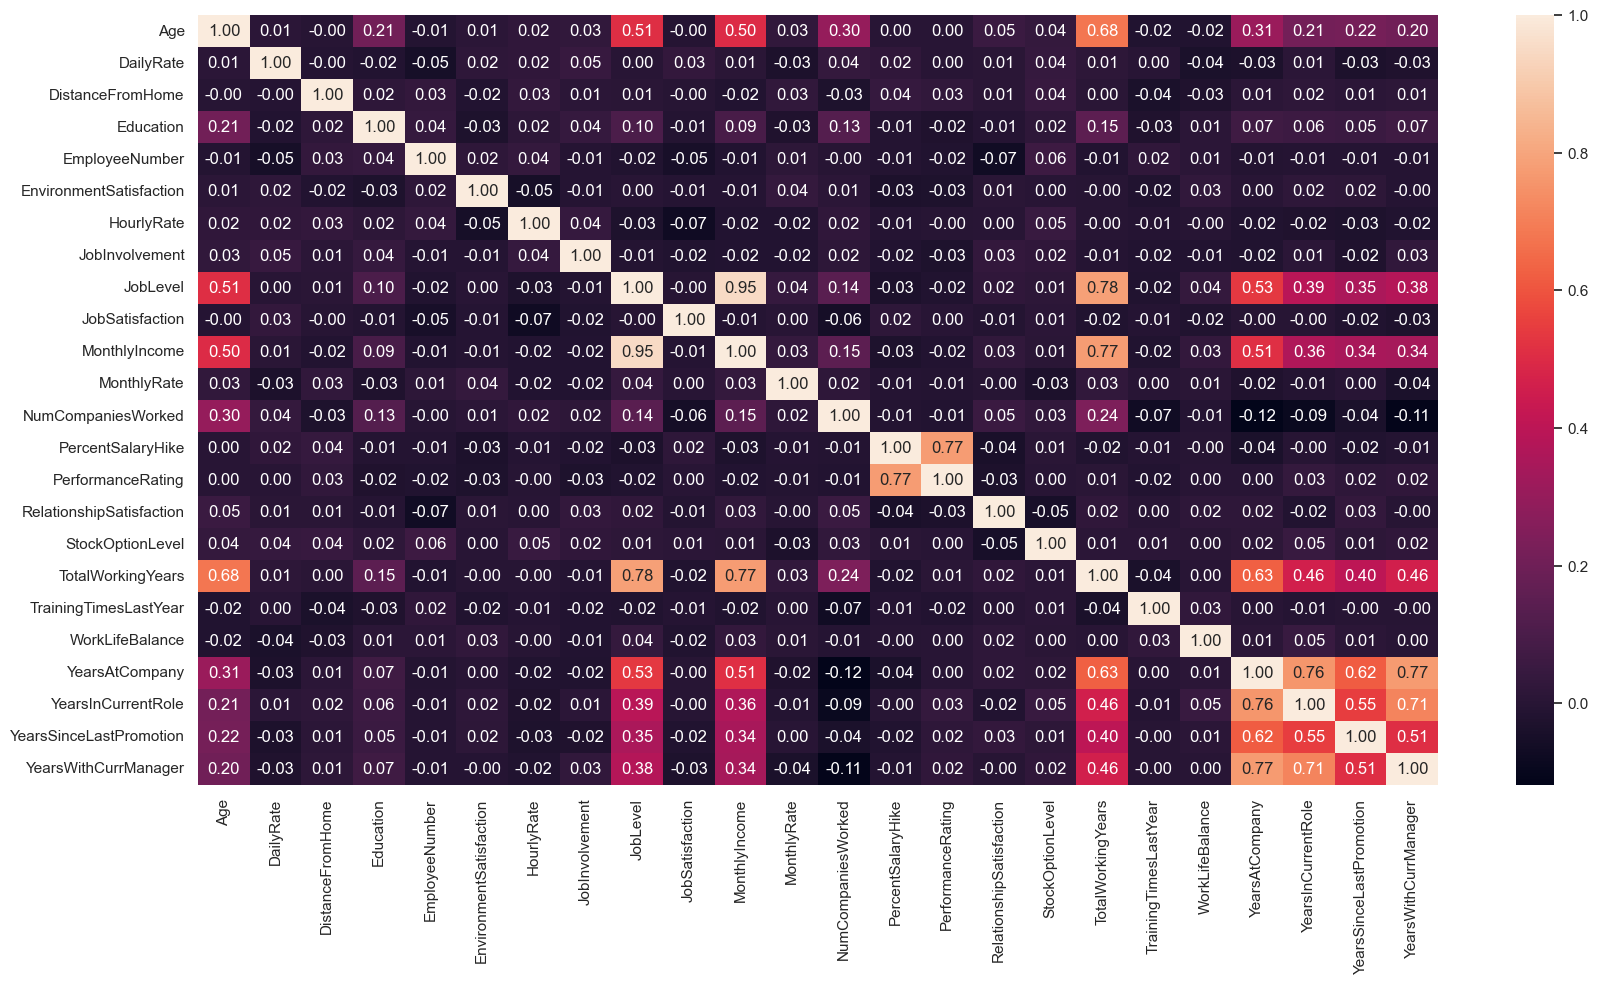

In [49]:
# Calculate the correlation matrix to see which features are correlated
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

The correlation matrix provides insights into the relationships between the variables, which can be useful for understanding the underlying
structure of the data and identifying potential patterns or trends.
- Age and Job Level have a moderate positive correlation (0.51), suggesting that older employees tend to have higher job levels.
- Monthly Income and Job Level have a very strong positive correlation (0.95), indicating that higher job levels correlate with higher incomes.
- Total Working Years and Monthly Income are also strongly correlated (0.77), highlighting that more experienced employees generally earn more
- Age and Total Working Years have a strong positive correlation (0.83), suggesting that older employees have more experience.    

The correlation matrix reveals that the variables are highly interrelated, with strong positive correlations between Age, Job
Level, Monthly Income, and Total Working Years.

Now we are going to find Attrition based insights, I am treating outlier in **"MonthlyIncome","YearsAtCompany"** column by *winsorize* method.

Outliers in MonthlyIncome have been treated
Outliers in YearsAtCompany have been treated
Outliers in TrainingTimesLastYear have been treated
Outliers in YearsSinceLastPromotion have been treated


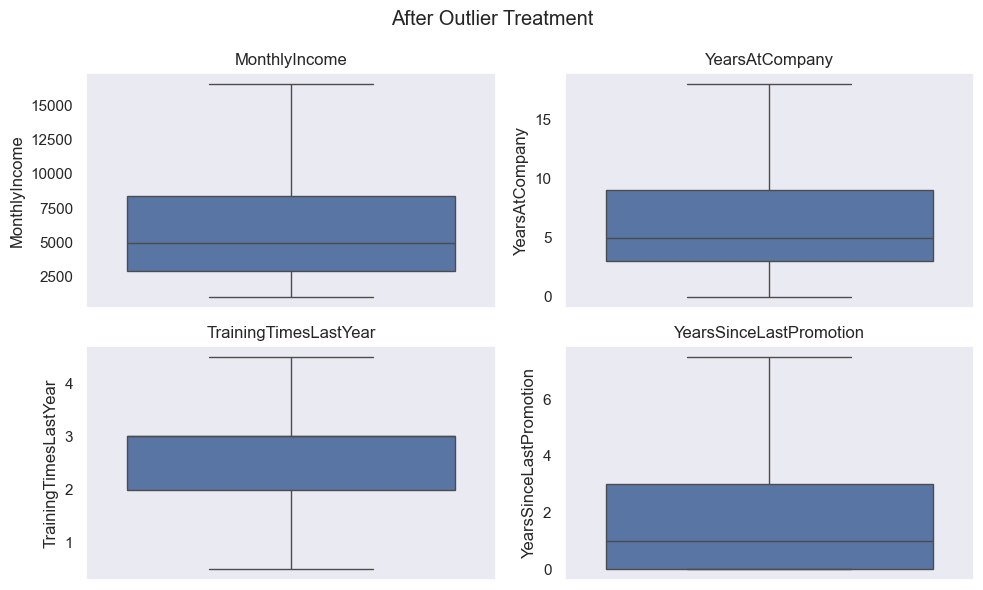

In [50]:
# treating outliers
df = outlier_treatment(df,["MonthlyIncome", "YearsAtCompany", "TrainingTimesLastYear", "YearsSinceLastPromotion"])

fig,axs = plt.subplots(2,2,figsize=(10,6))
sns.boxplot(y='MonthlyIncome',data=df,ax=axs[0,0])
sns.boxplot(y='YearsAtCompany',data=df,ax=axs[0,1])
sns.boxplot(y='TrainingTimesLastYear',data=df,ax=axs[1,0])
sns.boxplot(y='YearsSinceLastPromotion',data=df,ax=axs[1,1])
axs[0,0].set_title('MonthlyIncome')
axs[0,1].set_title('YearsAtCompany')
axs[1,0].set_title('TrainingTimesLastYear')
axs[1,1].set_title('YearsSinceLastPromotion')
plt.suptitle('After Outlier Treatment')
plt.tight_layout()
plt.show()          

In [51]:
# Check attrition-related insights by comparing metrics between Attrition groups
# Calculating mean values of certain attributes for Attrition "Yes" and "No" groups
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

attrition_insights = {
    'Mean Age - Attrition Yes': attrition_yes['Age'].mean(),
    'Mean Age - Attrition No': attrition_no['Age'].mean(),
    'Mean Monthly Income - Attrition Yes': attrition_yes['MonthlyIncome'].mean(),
    'Mean Monthly Income - Attrition No': attrition_no['MonthlyIncome'].mean(),
    'Mean Job Satisfaction - Attrition Yes': attrition_yes['JobSatisfaction'].mean(),
    'Mean Job Satisfaction - Attrition No': attrition_no['JobSatisfaction'].mean(),
    'Mean Years at Company - Attrition Yes': attrition_yes['YearsAtCompany'].mean(),
    'Mean Years at Company - Attrition No': attrition_no['YearsAtCompany'].mean(),
    
}

attrition_insights

{'Mean Age - Attrition Yes': 33.607594936708864,
 'Mean Age - Attrition No': 37.561232765612324,
 'Mean Monthly Income - Attrition Yes': 4726.274261603376,
 'Mean Monthly Income - Attrition No': 6676.280616382806,
 'Mean Job Satisfaction - Attrition Yes': 2.4683544303797467,
 'Mean Job Satisfaction - Attrition No': 2.778588807785888,
 'Mean Years at Company - Attrition Yes': 4.772151898734177,
 'Mean Years at Company - Attrition No': 6.9724249797242495}

- **Average Age**: Employees with attrition are younger (33.7) compared to those without (37.5).
- **Monthly Income**: The average monthly income is lower for employees with attrition ($4,751) than for those staying ($6,673).
- **Job Satisfaction**: Employees with attrition report lower job satisfaction (2.46) compared to those without (2.77).
- **Years at Company**: Employees with attrition have spent fewer years at the company (4.7) versus employees without attrition (6.9).

### Attrition Rates by Job Role

In [52]:
# Calculating attrition rate per job role
job_role_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
job_role_attrition = job_role_attrition.rename(columns={'Yes': 'Attrition Rate (%)'}).sort_values(by='Attrition Rate (%)', ascending=False)
job_role_attrition

Attrition,No,Attrition Rate (%)
JobRole,,
Sales Representative,60.240964,39.759036
Laboratory Technician,76.061776,23.938224
Human Resources,76.923077,23.076923
Sales Executive,82.515337,17.484663
Research Scientist,83.904110,16.095890
Manufacturing Director,93.103448,6.896552
Healthcare Representative,93.129771,6.870229
Manager,95.098039,4.901961
Research Director,97.500000,2.500000


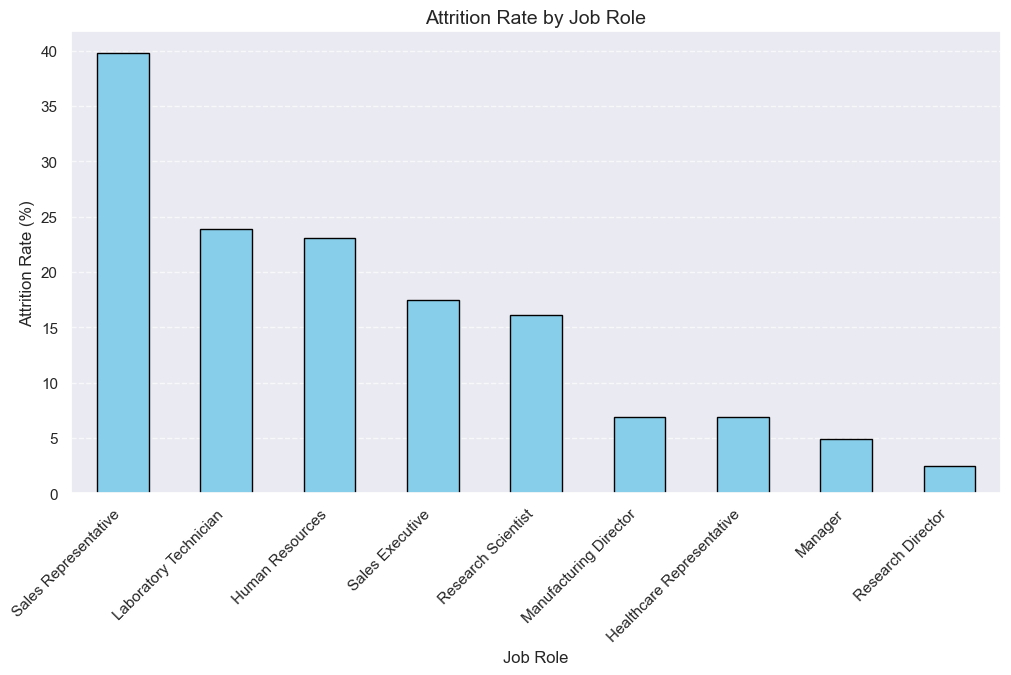

In [53]:
# Plotting the attrition rate by job role
plt.figure(figsize=(12, 6))
job_role_attrition['Attrition Rate (%)'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Attrition Rate by Job Role", fontsize=14)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xlabel("Job Role", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Attrition and Overtime

In [54]:
# Calculating attrition rates for employees working overtime vs those who don’t
overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100
overtime_attrition = overtime_attrition.rename(columns={'Yes': 'Attrition Rate (%)'}).sort_values(by='Attrition Rate (%)', ascending=False)
overtime_attrition

Attrition,No,Attrition Rate (%)
OverTime,,
Yes,69.471154,30.528846
No,89.563567,10.436433


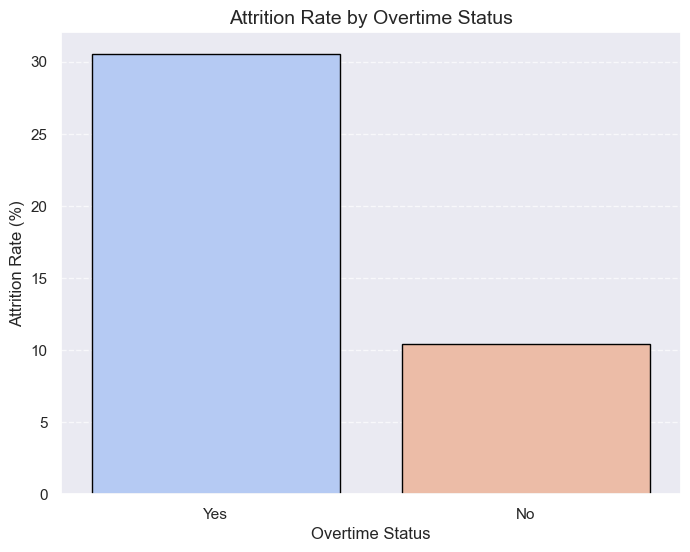

In [55]:
# Plotting the attrition rate for overtime
plt.figure(figsize=(8, 6))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition['Attrition Rate (%)'], palette='coolwarm', edgecolor='black')
plt.title("Attrition Rate by Overtime Status", fontsize=14)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xlabel("Overtime Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Gender-Wise Attrition

In [56]:

gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100
gender_attrition = gender_attrition.rename(columns={'Yes': 'Attrition Rate (%)'})
gender_attrition_rate = gender_attrition['Attrition Rate (%)']
gender_attrition_rate

Gender
Female    14.795918
Male      17.006803
Name: Attrition Rate (%), dtype: float64

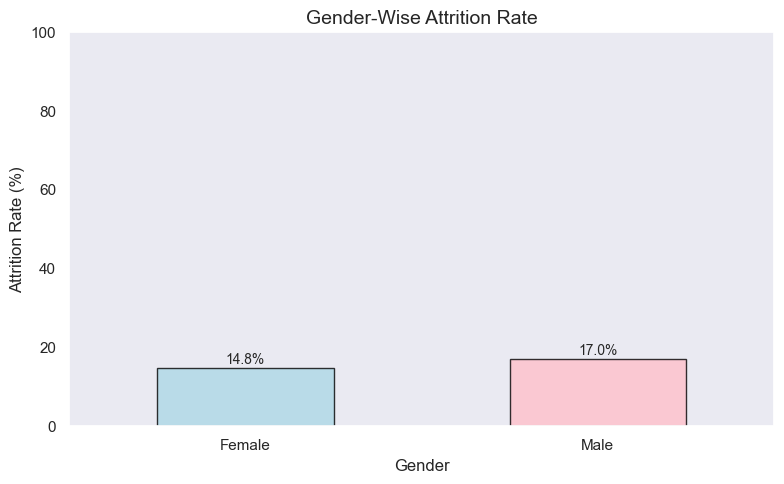

In [57]:

plt.figure(figsize=(8, 5))
gender_attrition_rate.plot(kind='bar', color=['lightblue', 'pink'], alpha=0.8, edgecolor='black')
plt.title('Gender-Wise Attrition Rate', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)

for index, value in enumerate(gender_attrition_rate):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


### Attrition and Work-Life Balance

In [58]:
# Calculating average work-life balance for employees with and without attrition
work_life_balance_attrition = df.groupby('Attrition')['WorkLifeBalance'].mean()
work_life_balance_attrition

Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64

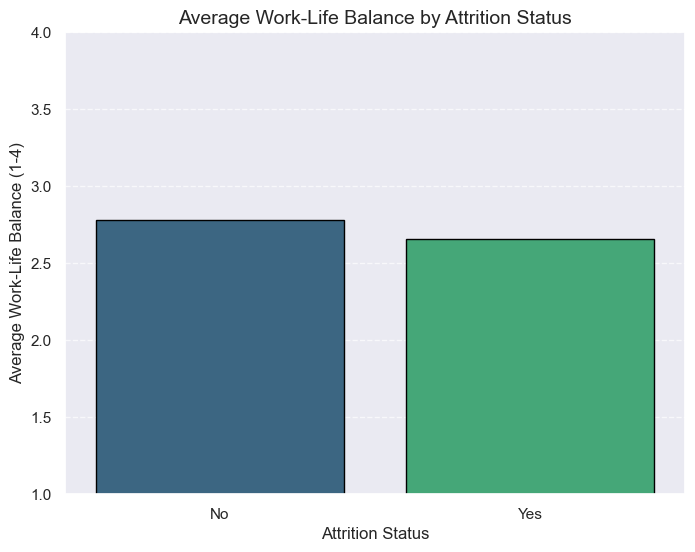

In [59]:
# Plotting the work-life balance comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=work_life_balance_attrition.index, y=work_life_balance_attrition.values, palette='viridis', edgecolor='black')
plt.title("Average Work-Life Balance by Attrition Status", fontsize=14)
plt.ylabel("Average Work-Life Balance (1-4)", fontsize=12)
plt.xlabel("Attrition Status", fontsize=12)
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Department-Wise Analysis of Monthly Income and Satisfaction

In [60]:
# Calculating average monthly income and job satisfaction by department
department_analysis = df.groupby('Department').agg({
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean',
    'Attrition': lambda x: (x == 'Yes').mean() * 100  # Attrition rate as a percentage
}).rename(columns={'Attrition': 'Attrition Rate (%)', 'MonthlyIncome': 'Average Monthly Income', 'JobSatisfaction': 'Average Job Satisfaction'})

department_analysis


,Average Monthly Income,Average Job Satisfaction,Attrition Rate (%)
Department,,,
Human Resources,6348.428571,2.603175,19.047619
Research & Development,6126.566077,2.726327,13.839750
Sales,6870.852018,2.751121,20.627803


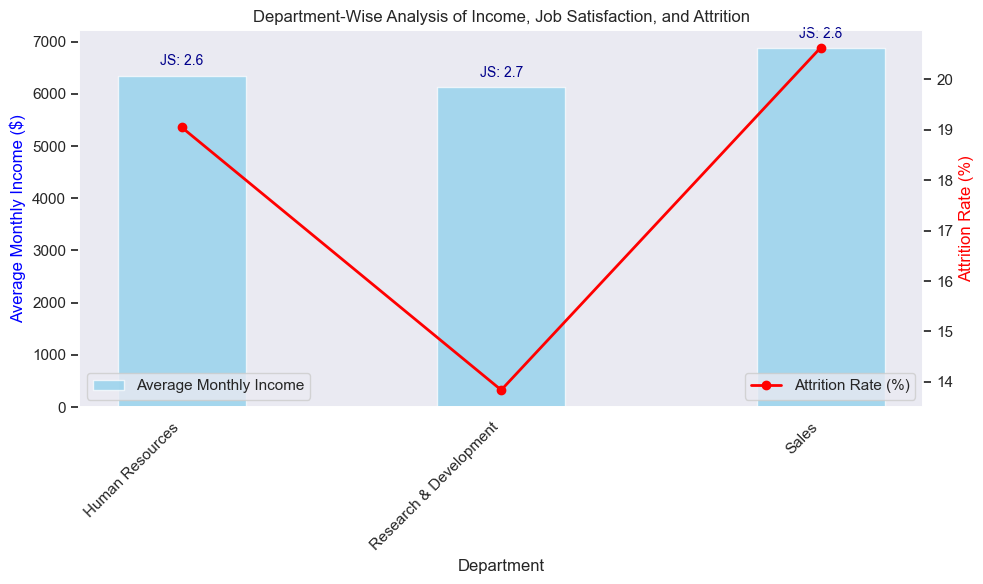

In [61]:
# Extracting data for plotting from department_analysis
departments = department_analysis.index
average_income = department_analysis['Average Monthly Income']
average_satisfaction = department_analysis['Average Job Satisfaction']
attrition_rate = department_analysis['Attrition Rate (%)']

# Creating a dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Average Monthly Income
bar_width = 0.4
bar_positions = range(len(departments))
ax1.bar(bar_positions, average_income, width=bar_width, color='skyblue', label='Average Monthly Income', alpha=0.7)
ax1.set_ylabel('Average Monthly Income ($)', color='blue')
ax1.set_xlabel('Department')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(departments, rotation=45, ha='right')

# Adding a secondary y-axis for Attrition Rate
ax2 = ax1.twinx()
ax2.plot(bar_positions, attrition_rate, color='red', marker='o', label='Attrition Rate (%)', linewidth=2)
ax2.set_ylabel('Attrition Rate (%)', color='red')

# Adding Average Job Satisfaction on the same bar
for idx, value in enumerate(average_satisfaction):
    ax1.text(idx, average_income[idx] + 200, f'JS: {value:.1f}', ha='center', color='darkblue', fontsize=10)

# Adding a title and legend
plt.title('Department-Wise Analysis of Income, Job Satisfaction, and Attrition')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

### Conclusion

The analysis highlights critical areas affecting employee retention, including job roles, work-life balance, and overtime. By addressing these issues, the organization can improve employee satisfaction and reduce attrition rates.